In [1]:
# required packages
import os
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
djia_df = pd.read_csv('Data/DJIA.csv')

In [4]:
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [6]:
# Let us parse the Date column and use as row index for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'])
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [7]:
#Let us see first few rows of the modified DataFrame
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [8]:
# We would be using the 'Close' values of the DJIA to illustrate Differencing
first_order_diff = djia_df['Close'].diff(1)

Text(0.5,1,'First-order differences of DJIA')

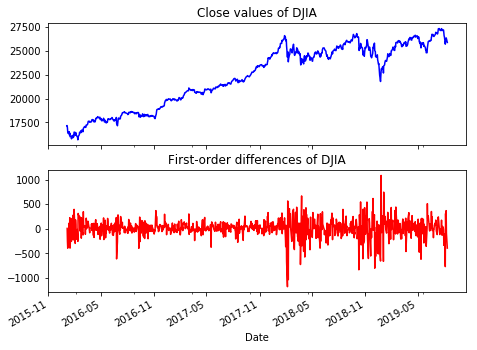

In [9]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(7.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA')
# plt.savefig('plots/ch2/B07887_02_06.png', format='png', dpi=300)

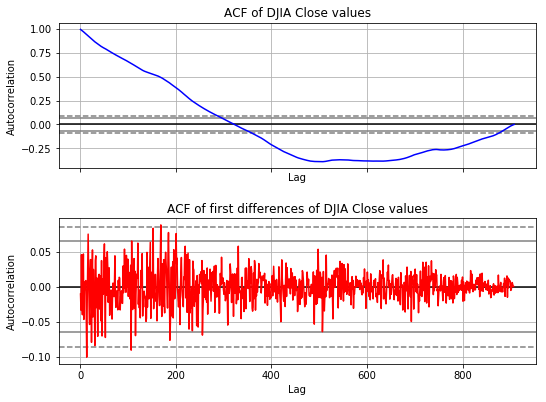

In [10]:
#Let us plot the ACFs of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(7.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
# plt.savefig('plots/ch2/B07887_02_07.png', format='png', dpi=300)

In [10]:
"""
Now we will perform the Ljung-Box test on the ACFs
of the original time series and the first-differences.
For running the test we will limit upto 20 lags
"""

'\nNow we will perform the Ljung-Box test on the ACFs\nof the original time series and the first-differences.\nFor running the test we will limit upto 20 lags\n'

In [11]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the original DJIA Close values
"""
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 unbiased=True,
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

In [12]:
"""Let us check if at confidence level 95% (alpha=0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 4.287410348528202e-199
Null hypothesis is rejected at lag = 1 for p-val = 0.0
Null hypothesis is rejected at lag = 2 for p-val = 0.0
Null hypothesis is rejected at lag = 3 for p-val = 0.0
Null hypothesis is rejected at lag = 4 for p-val = 0.0
Null hypothesis is rejected at lag = 5 for p-val = 0.0
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0
Null hypothesis is rejected at lag = 16 for p-val = 0.0
Null hypothesis is rejected at lag = 17

In [13]:
"""
The above results show statistically significant ACF in the original DJIA Close values
"""

'\nThe above results show statistically significant ACF in the original DJIA Close values\n'

In [13]:
"""
Let us obtain the confidence intervls, Ljung-Box Q-statistics and p-values
for the differenced DJIA Close values
"""
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     unbiased=True,
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

In [14]:
"""Let us check if at confidence level of 95% (alpha = 0.05)
if the null hypothesis is rejected at any of the lags
"""
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.7485194127743193
Null hypothesis is accepted at lag = 1 for p-val = 0.5651993837475434
Null hypothesis is accepted at lag = 2 for p-val = 0.38525597997393835
Null hypothesis is accepted at lag = 3 for p-val = 0.4479305673793931
Null hypothesis is accepted at lag = 4 for p-val = 0.39265605456224734
Null hypothesis is accepted at lag = 5 for p-val = 0.5078137898162038
Null hypothesis is accepted at lag = 6 for p-val = 0.3987141874841873
Null hypothesis is accepted at lag = 7 for p-val = 0.3141527244637422
Null hypothesis is accepted at lag = 8 for p-val = 0.40257300063887913
Null hypothesis is accepted at lag = 9 for p-val = 0.49227105623930767
Null hypothesis is accepted at lag = 10 for p-val = 0.5826109370767765
Null hypothesis is accepted at lag = 11 for p-val = 0.6600628857475643
Null hypothesis is accepted at lag = 12 for p-val = 0.617016461998499
Null hypothesis is accepted at lag = 13 for p-val = 0.11273735976266352
Null hypothe

In [16]:
"""
The above results show that ACF is essentially random in the differenced DJIA Close values
"""

'\nThe above results show that ACF is essentially random in the differenced DJIA Close values\n'